# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
    
# Save to CSV file
list_of_cities = pd.DataFrame(cities)
list_of_cities.to_csv(output_data_file)

# Print the city count to confirm sufficient count
len(cities)

585

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create lists to store weather data

city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

record = 1

print ("Beginning Data Retrieval")
print ("-----------------------------")

# Loop through cities using try-except statements

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

for city in cities:
    try:
        query_url = url + "&q=" + city
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        city_name.append(weather_json["name"])
        cloudiness.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        max_temp.append(weather_json["main"]["temp_max"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        wind_speed.append(weather_json["wind"]["speed"])
        city_record = weather_json["name"]
        city_id = weather_json["id"]
        print(f"Processing Record {record} | {city_id} {city_record} ")
        record = record + 1
    except:
        print("City not found. Skipping...")

print ("-----------------------------")
print ("Data Retrieval Complete")
print ("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 | 2035002 Shangzhi 
Processing Record 2 | 5847411 Kahului 
Processing Record 3 | 1273574 Vaini 
Processing Record 4 | 2169535 Dalby 
Processing Record 5 | 217562 Butembo 
Processing Record 6 | 4920577 Galveston 
Processing Record 7 | 3461465 Iguape 
Processing Record 8 | 933211 Nokaneng 
City not found. Skipping...
City not found. Skipping...
Processing Record 9 | 6320062 Vila Velha 
Processing Record 10 | 1651810 Airai 
Processing Record 11 | 4030556 Rikitea 
Processing Record 12 | 4035715 Avarua 
Processing Record 13 | 3985710 Cabo San Lucas 
Processing Record 14 | 2240449 Luanda 
Processing Record 15 | 513898 Otradnoye 
City not found. Skipping...
Processing Record 16 | 546105 Nikolskoye 
City not found. Skipping...
Processing Record 17 | 608036 Temir 
Processing Record 18 | 3156980 Floro 
Processing Record 19 | 487928 Novikovo 
Processing Record 20 | 3424607 Tasiilaq 
Processing Record 21 | 3366880 Hermanus 

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Store data in a dictionary
weather_data = {
    "City" : city_name,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Wind Speed": wind_speed}

# Convert dictionary into a data frame
weather_data_df = pd.DataFrame(weather_data)

# Save to CSV file
weather_data_df.to_csv('WeatherPy_Data.csv')

In [5]:
weather_data_df.count()

City          523
Cloudiness    523
Country       523
Date          523
Humidity      523
Lat           523
Lng           523
Max Temp      523
Wind Speed    523
dtype: int64

In [6]:
weather_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Shangzhi,100,CN,1578270081,82,45.21,127.96,11.59,2.08
1,Kahului,20,US,1578269861,54,20.89,-156.47,82.40,24.16
2,Vaini,75,IN,1578270081,82,15.34,74.49,68.00,4.70
3,Dalby,90,AU,1578270082,45,-27.18,151.26,89.01,13.87
4,Butembo,65,CD,1578270082,93,0.12,29.29,60.24,3.56


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

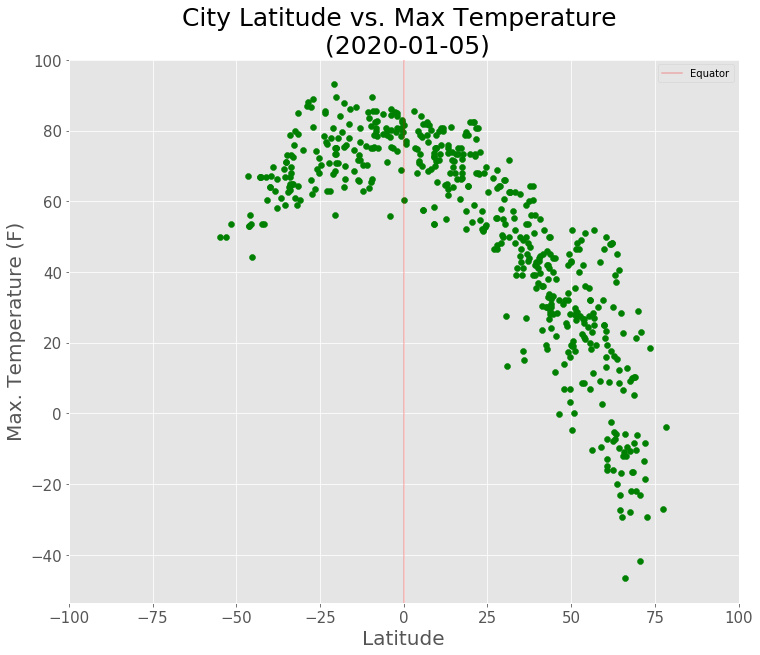

In [11]:
# Create scatter plot

plt.title("City Latitude vs. Max Temperature \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Max. Temperature (F)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Max Temp"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Temperature.png")

plt.show()

### Latitude vs. Humidity Plot

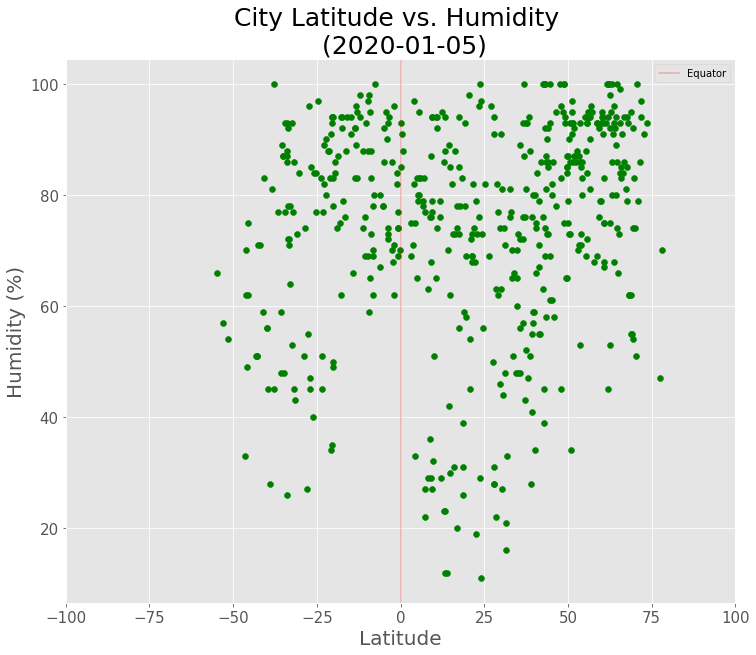

In [8]:
# Create scatter plot

plt.title("City Latitude vs. Humidity \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Humidity (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Humidity"], marker = "o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Humidity.png")

plt.show()

### Latitude vs. Cloudiness Plot

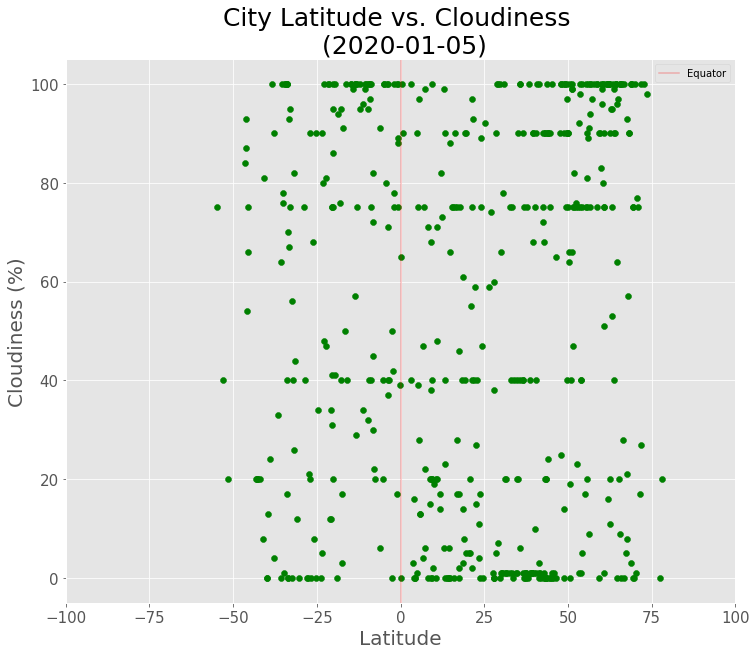

In [9]:
# Create scatter plot

plt.title("City Latitude vs. Cloudiness \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Cloudiness (%)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)


plt.scatter(weather_data_df["Lat"], weather_data_df["Cloudiness"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_Cloudiness.png")

plt.show()

### Latitude vs. Wind Speed Plot

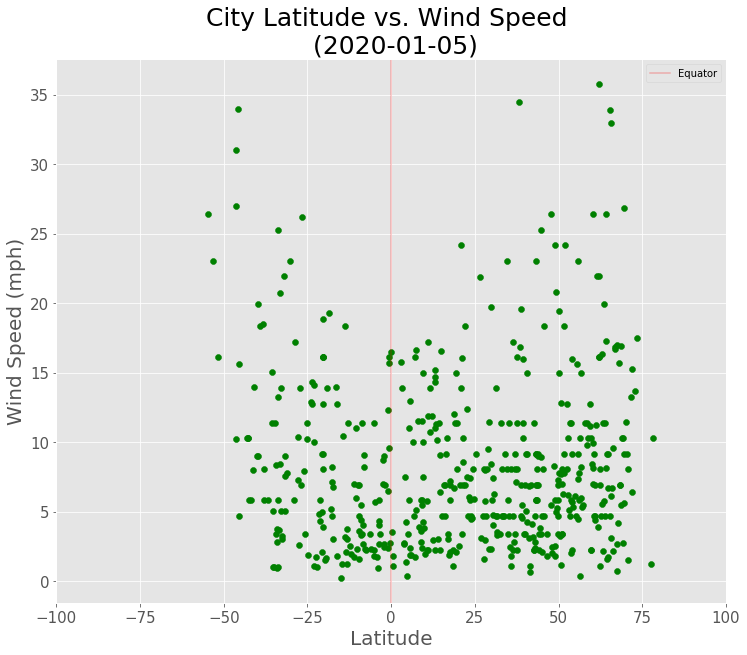

In [10]:
# Create scatter plot

plt.title("City Latitude vs. Wind Speed \n (%s)" % datetime.today().strftime('%Y-%m-%d'), fontsize = 25)
plt.xlabel("Latitude", fontsize = 20)
plt.ylabel("Wind Speed (mph)", fontsize = 20)
plt.gcf().set_size_inches((12, 10))
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlim(-100,100)

plt.scatter(weather_data_df["Lat"], weather_data_df["Wind Speed"], marker="o", color = 'green')
plt.axvline(0, color = 'red', alpha = .25, label='Equator')
plt.legend()
plt.style.use("ggplot")

plt.savefig("Latitude_vs_WindSpeed.png")

plt.show()

## Observable Trends

1) The first plot (Latitude vs. Temperature) shows the obvious: temperatures near the equator are hotter than those further away from it.

2) The second plot (Latitude vs. Humidity) shows there is a cluster of cities near the equator and at about 50 to 70 degrees latitude. The relative humidity is high near the equator because the actual vapor pressure is high. The relative humidity is also high near the poles because the saturation vapor pressure is low. Since cold air can hold less moisture than warm air, as we cool the air it will eventually become saturated.

3) The Latitude vs. Cloudiness plot shows that most of the cities from the data are cloudy. One study based on nearly a decade of satellite data estimated that about 67 percent of Earth’s surface is typically covered by clouds. We can also see that a cluster of cities near the equator is 100% cloudy. The band near the equator is a function of the large scale circulation patterns—or Hadley cells—present in the tropics. Hadley cells are defined by cool air sinking near the 30 degree latitude line north and south of the equator and warm air rising near the equator where winds from separate Hadley cells converge. As warm, moist air converges at lower altitudes near the equator, it rises and cools and therefore can hold less moisture. This causes water vapor to condense into cloud particles and produces a dependable band of thunderstorms in an area known as the Inter Tropical Convergence Zone (ITCZ). (source: NASA)

4) Clouds also tend to form in abundance in the middle latitudes 60 degrees north and south of the equator. There is a cluster of cities at about 60 degrees on the plot that shows 100% cloudy. This is where the edges of polar and mid-latitude (or Ferrel) circulation cells collide and push air upward, fueling the formation of the large-scale frontal systems that dominate weather patterns in the mid-latitudes. While clouds tend to form where air rises as part of atmospheric circulation patterns, descending air inhibits cloud formation. Since air descends between about 15 and 30 degrees north and south of the equator, clouds are rare and deserts are common at this latitude. (source: NASA) The plot shows a cluster of cities with 0% cloudiness at these latitudes.

5) The wind speed is generally the same (between 3mph to 12mph) for most of the cities.